# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm
import csv

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
# I have opted to do a paliminary output file and a final output file
    # to give me more control over vetting results
output_data_file = "output_data/cities.csv"
final_output_data_file = "output_data/cities_final.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


624

In [3]:
# This was used to look at the cities structure
# print(cities)

In [4]:
### Saving out the city pull [swithcer between the full and 10]

##### --------- NOTE THAT WE CAN SWITCH BETWEEN RUNNING 10 and RUNNING ALL ---------------
# Switch the # between the next two lines to get ether all of the cities or just the first 10

# all cities
cities_df = pd.DataFrame(cities, columns=["city"])

# Just the first 10 cities
# cities_df = pd.DataFrame(cities[:10], columns=["city"])

# Creates the CSV file
cities_df.to_csv(output_data_file, header=True, index=False)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# This section pulls the data for each city

# get the API key
from api_keys import api_key


# from urllib2 import HTTPError
from urllib.error import HTTPError

colnames = ['city']
data = pd.read_csv(output_data_file, names=colnames)
cities_list = data.city.tolist()

# removes the word Cities from our list
del cities_list[0]
# print(cities_list)

# Create settings dictionary with information we're interested in, including the URL
settings = {"units": "imperial", "appid": api_key}
url = "https://api.openweathermap.org/data/2.5/weather?q="

# adds the fields we need to the dataframe
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
maxtemp = []
windspeed = []
i = 0

# runs the for/try/except loop for getting the data for each city

for city in cities_list:
    try:
        response = requests.get(url + city + "&units=imperial" + "&appid=" + api_key).json()
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        i = i + 1
        print(f"Processing Record {i} of {len(cities_list)} | {city}")
        # note we have a one second delay so that we will not pull more than the 60 records per minute that the API allows.
        time.sleep(1)
    except Exception as x:
#         print(x)
        print(f"City not found. Skipping ", city)
        pass

  
# adds the data we got into the dataframe

weather_data = pd.DataFrame({
    "City": name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": maxtemp,
    "Wind Speed": windspeed})

# outputs our updated dataframe to screen for valadation
weather_data    



Processing Record 1 of 624 | barrow
Processing Record 2 of 624 | saskylakh
Processing Record 3 of 624 | punta arenas
Processing Record 4 of 624 | shache
Processing Record 5 of 624 | miyako
Processing Record 6 of 624 | carnarvon
Processing Record 7 of 624 | chokurdakh
Processing Record 8 of 624 | busselton
Processing Record 9 of 624 | badvel
Processing Record 10 of 624 | ushuaia
Processing Record 11 of 624 | atuona
Processing Record 12 of 624 | severo-kurilsk
Processing Record 13 of 624 | albany
Processing Record 14 of 624 | lake cowichan
Processing Record 15 of 624 | beatrice
Processing Record 16 of 624 | bolshoy kamen
Processing Record 17 of 624 | bredasdorp
Processing Record 18 of 624 | bluff
Processing Record 19 of 624 | jamestown
Processing Record 20 of 624 | aklavik
Processing Record 21 of 624 | bambous virieux
Processing Record 22 of 624 | bakchar
Processing Record 23 of 624 | roma
Processing Record 24 of 624 | lethem
Processing Record 25 of 624 | kirovskiy
Processing Record 26 o

Processing Record 187 of 624 | awjilah
Processing Record 188 of 624 | healdsburg
Processing Record 189 of 624 | willowmore
Processing Record 190 of 624 | bathsheba
Processing Record 191 of 624 | palanit
Processing Record 192 of 624 | bera
Processing Record 193 of 624 | hofn
Processing Record 194 of 624 | inuvik
Processing Record 195 of 624 | voh
Processing Record 196 of 624 | ponta do sol
Processing Record 197 of 624 | brattvag
Processing Record 198 of 624 | royan
Processing Record 199 of 624 | kaeo
Processing Record 200 of 624 | vila velha
Processing Record 201 of 624 | svelgen
Processing Record 202 of 624 | sitka
Processing Record 203 of 624 | elat
Processing Record 204 of 624 | la ronge
Processing Record 205 of 624 | churachandpur
City not found. Skipping  palabuhanratu
Processing Record 206 of 624 | esqueda
Processing Record 207 of 624 | numan
Processing Record 208 of 624 | maldonado
Processing Record 209 of 624 | port lincoln
Processing Record 210 of 624 | colombo
Processing Recor

City not found. Skipping  korla
Processing Record 373 of 624 | campos altos
Processing Record 374 of 624 | sur
City not found. Skipping  katsiveli
Processing Record 375 of 624 | champerico
Processing Record 376 of 624 | pacific grove
Processing Record 377 of 624 | eureka
Processing Record 378 of 624 | hovd
Processing Record 379 of 624 | sovetskaya gavan
Processing Record 380 of 624 | lompoc
Processing Record 381 of 624 | lluta
Processing Record 382 of 624 | zhigansk
Processing Record 383 of 624 | kavieng
Processing Record 384 of 624 | bulungu
Processing Record 385 of 624 | sioux lookout
Processing Record 386 of 624 | barraute
Processing Record 387 of 624 | xacmaz
Processing Record 388 of 624 | vilhena
Processing Record 389 of 624 | yumen
Processing Record 390 of 624 | leh
Processing Record 391 of 624 | norman wells
Processing Record 392 of 624 | lobito
Processing Record 393 of 624 | kribi
Processing Record 394 of 624 | port hardy
Processing Record 395 of 624 | petropavlovsk-kamchatskiy

Processing Record 559 of 624 | urzhum
Processing Record 560 of 624 | mount gambier


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,32,AR,1547396426,98,-38.31,-60.23,75.03,0.87
1,Saskylakh,0,RU,1547396423,0,71.97,114.09,-59.21,5.39
2,Punta Arenas,75,CL,1547395200,62,-53.16,-70.91,53.60,26.40
3,Shache,24,CN,1547396986,67,38.42,77.24,16.89,3.89
4,Miyako,75,JP,1547395200,75,33.63,130.94,46.40,3.36
5,Carnarvon,0,ZA,1547396430,25,-30.97,22.13,83.58,12.95
6,Chokurdakh,68,RU,1547396450,55,70.62,147.90,-18.48,4.83
7,Busselton,0,AU,1547396422,100,-33.64,115.35,64.23,20.56
8,Badvel,0,IN,1547396993,68,14.74,79.07,68.87,5.50
9,Ushuaia,40,AR,1547395200,61,-54.81,-68.31,53.60,41.38


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# saves out our data into a CSV file
#### NOTE that we are saving it to cities_final.csv
####                                      ^^^^

weather_data.to_csv(final_output_data_file, header=True, index=False)

In [7]:
# gets the count for each field so that we know that all were populated
weather_data.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [8]:
# outputs the first 5 records to screen for valadation
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Barrow,32,AR,1547396426,98,-38.31,-60.23,75.03,0.87
1,Saskylakh,0,RU,1547396423,0,71.97,114.09,-59.21,5.39
2,Punta Arenas,75,CL,1547395200,62,-53.16,-70.91,53.60,26.40
3,Shache,24,CN,1547396986,67,38.42,77.24,16.89,3.89
4,Miyako,75,JP,1547395200,75,33.63,130.94,46.40,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

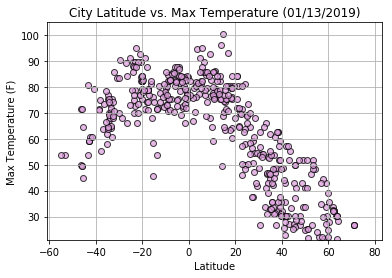

In [9]:
## plots the Latitude vs. Temperature Plot

# Obtain the x and y coordinates for the plot
plt.ylim(21,105)
# plt.ylim(21,315)
plt.xlim(-61,83)
# Build the scatter plots for the citys
x_axisu = weather_data["Lat"]
y_axisu = weather_data["Max Temp"]

# set the colors
temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="plum",edgecolors="black", alpha=0.75)
plt.grid()

# add the titleing NOTE:pd.datetime.today().strftime("%m/%d/%Y") calls todays date
plt.title("City Latitude vs. Max Temperature (" + pd.datetime.today().strftime("%m/%d/%Y") + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# saves the file as an image and showes it on screen
plt.savefig("output_data/City_Latitude_vs_Max_Temperature.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Humidity Plot

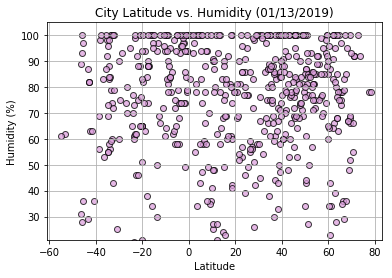

In [10]:
## Latitude vs. Humidity Plot

# Obtain the x and y coordinates for the plot
plt.ylim(21,105)
# plt.ylim(21,315)
plt.xlim(-61,83)
# Build the scatter plots for the citys
x_axisu = weather_data["Lat"]
y_axisu = weather_data["Humidity"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="plum",edgecolors="black", alpha=0.75)
plt.grid()

# add the titleing NOTE:pd.datetime.today().strftime("%m/%d/%Y") calls todays date
plt.title("City Latitude vs. Humidity (" + pd.datetime.today().strftime("%m/%d/%Y") + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# saves the file as an image and showes it on screen
plt.savefig("output_data/City_Latitude_vs_Humidity.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Cloudiness Plot

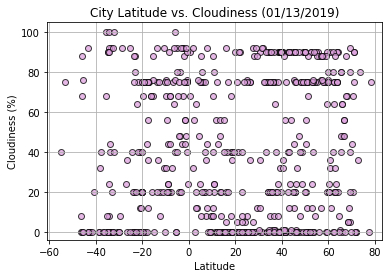

In [11]:
## Latitude vs. Cloudiness Plot

# Obtain the x and y coordinates for the plot
plt.ylim(-4,105)
plt.xlim(-61,83)
# Build the scatter plots for the citys
x_axisu = weather_data["Lat"]
y_axisu = weather_data["Cloudiness"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="plum",edgecolors="black", alpha=0.75)
plt.grid()

# add the titleing NOTE:pd.datetime.today().strftime("%m/%d/%Y") calls todays date
plt.title("City Latitude vs. Cloudiness (" + pd.datetime.today().strftime("%m/%d/%Y") + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# saves the file as an image and showes it on screen
plt.savefig("output_data/City_Latitude_vs_Cloudiness.png", bbox_inches="tight")
plt.show()

#### Latitude vs. Wind Speed Plot

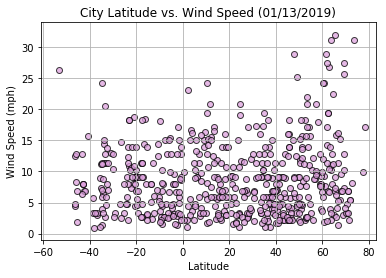

In [12]:
## Latitude vs. Wind Speed Plot

# Obtain the x and y coordinates for the plot
plt.ylim(-1,34)
plt.xlim(-61,83)
# Build the scatter plots for the citys
x_axisu = weather_data["Lat"]
y_axisu = weather_data["Wind Speed"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="plum",edgecolors="black", alpha=0.75)
plt.grid()

# add the titleing NOTE:pd.datetime.today().strftime("%m/%d/%Y") calls todays date
plt.title("City Latitude vs. Wind Speed (" + pd.datetime.today().strftime("%m/%d/%Y") + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/City_Latitude_vs_Wind_Speed.png", bbox_inches="tight")
plt.show()